<a href="https://colab.research.google.com/github/dmehraj01/LinearRegression/blob/main/mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c spaceship-titanic

In [3]:
!unzip mobile.zip

Archive:  mobile.zip
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd

In [5]:
mobile_train = pd.read_csv('/content/train.csv')
mobile_test = pd.read_csv('/content/test.csv')

In [6]:
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
# no.of data point in traing and testing data
print("Size of training data is : {} \nSize of testing data is: {}".format(len(mobile_train), len(mobile_test)))

Size of training data is : 2000 
Size of testing data is: 1000


In [11]:
# no. of features
len(mobile_train.columns)

21

# EDA

In [13]:
train_data = mobile_train.copy()

In [15]:
# Checking Summary statistics
mobile_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [16]:
# check missing values
mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [17]:
correlation = mobile_train.corr()
correlation['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

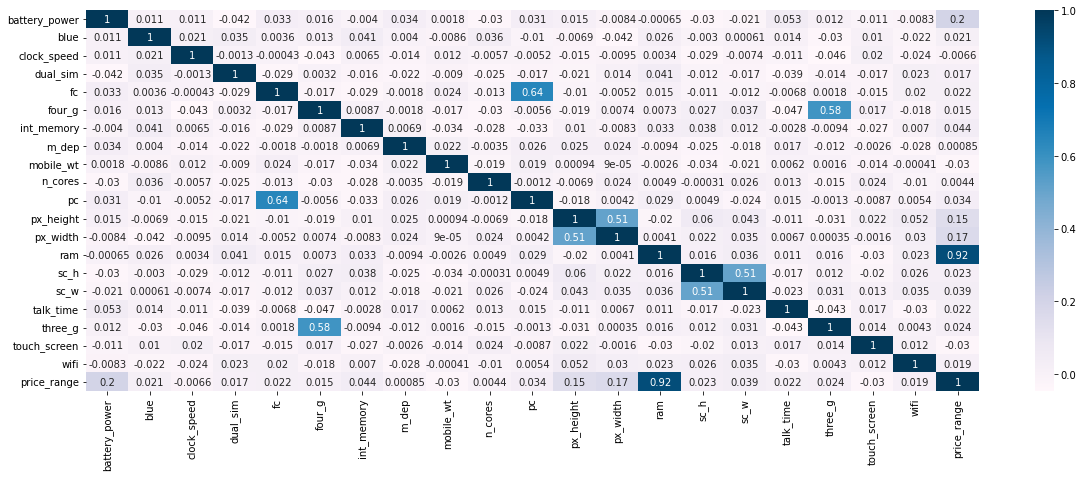

In [18]:
# visualising Correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,7))
sns.heatmap(correlation, annot = True, cmap = 'PuBu')

In [19]:
mobile_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mobile Price Ranges')

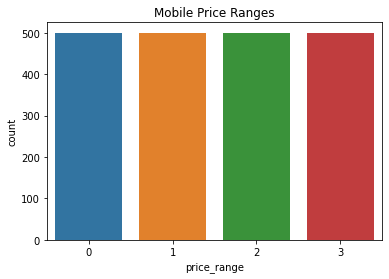

In [20]:
sns.countplot(mobile_train['price_range'])   # to check data imbalance
plt.title('Mobile Price Ranges')

Text(0.5, 1.0, 'Number of cores')

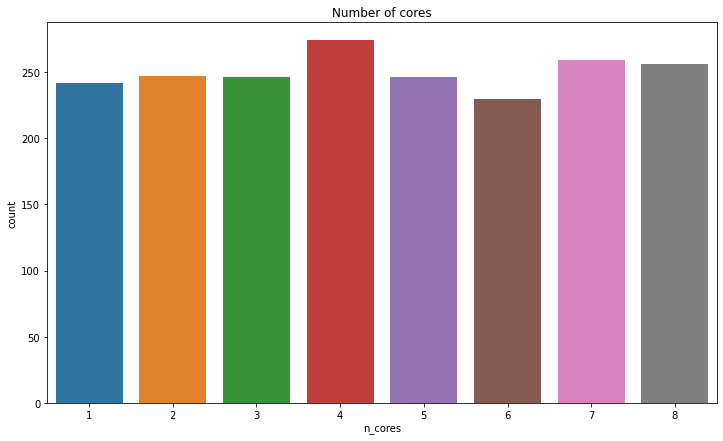

In [23]:
plt.figure(figsize = (12,7))
sns.countplot(data = mobile_train , x = 'n_cores')
plt.title('Number of cores')

Text(0.5, 1.0, 'Number of cores')

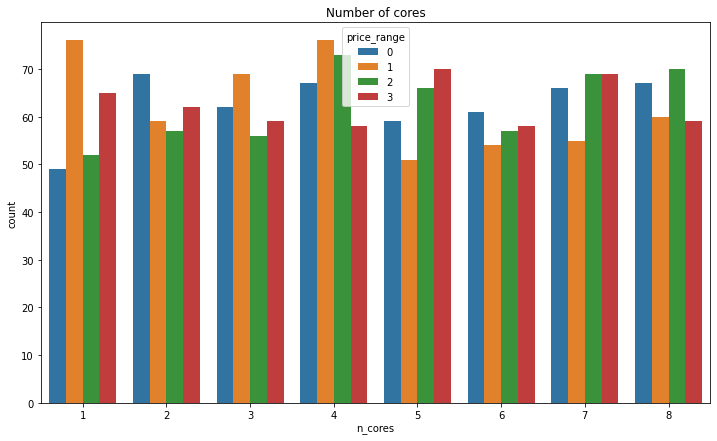

In [24]:
plt.figure(figsize = (12,7))
sns.countplot(data = mobile_train, x = 'n_cores', hue = 'price_range')
plt.title('Number of cores')

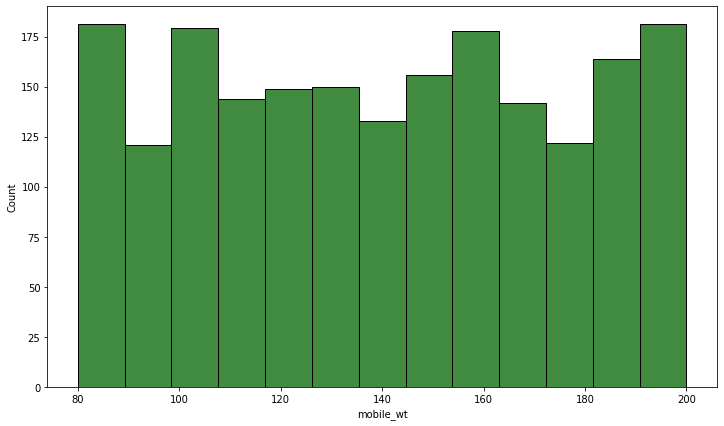

In [25]:
plt.figure(figsize  = (12,7))
sns.histplot(data = mobile_train, x = 'mobile_wt', color = 'darkgreen')

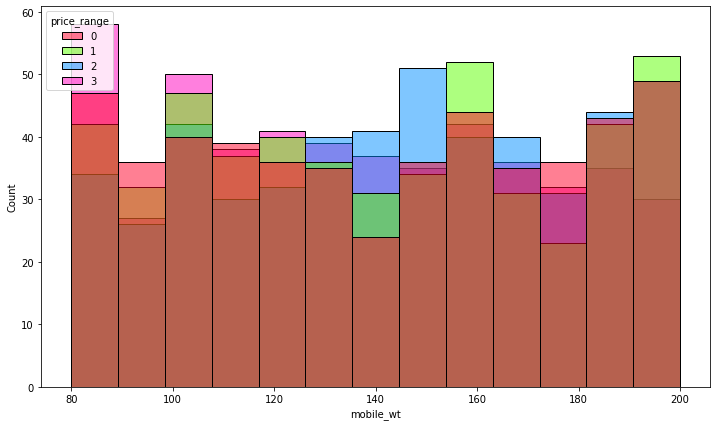

In [29]:
plt.figure(figsize  = (12,7))
sns.histplot(data = mobile_train, x = 'mobile_wt', hue = 'price_range', palette ='gist_rainbow')

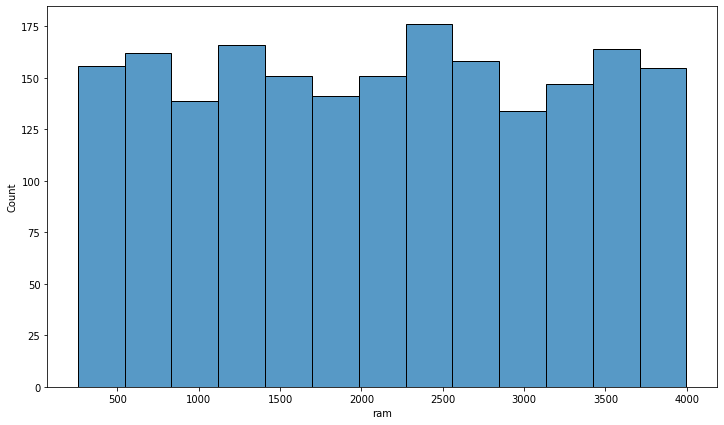

In [31]:
plt.figure(figsize = (12,7))
sns.histplot(data = mobile_train, x ='ram',palette = 'PRGn')

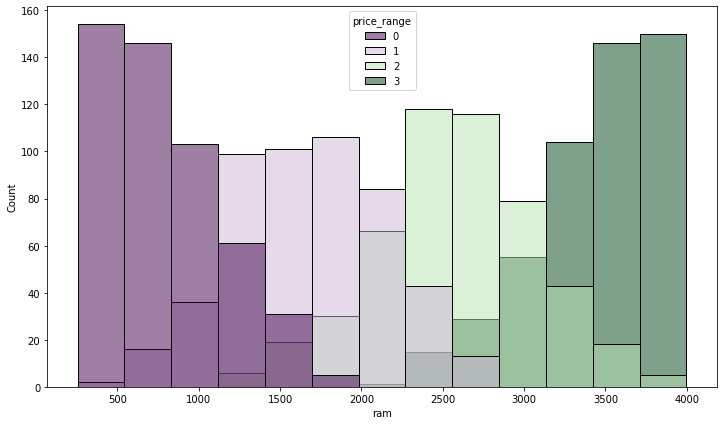

In [32]:
plt.figure(figsize = (12,7))
sns.histplot(data = mobile_train, x ='ram',palette = 'PRGn', hue = 'price_range')

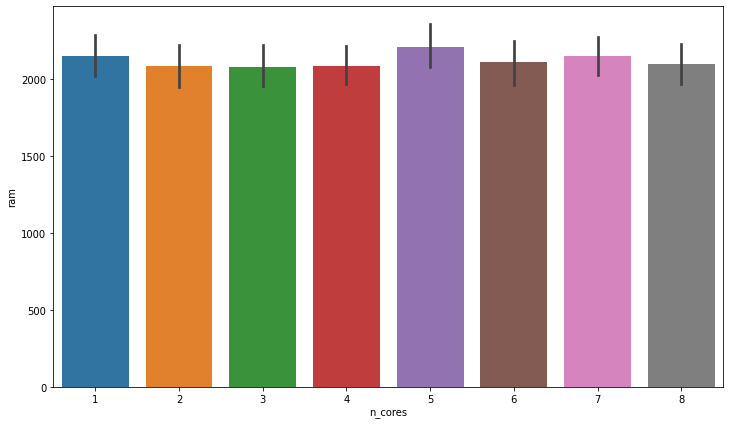

In [34]:
plt.figure(figsize = (12,7))
sns.barplot(data =mobile_train, x ='n_cores', y ='ram')

Text(0.5, 1.0, 'Front camera vs primary camera')

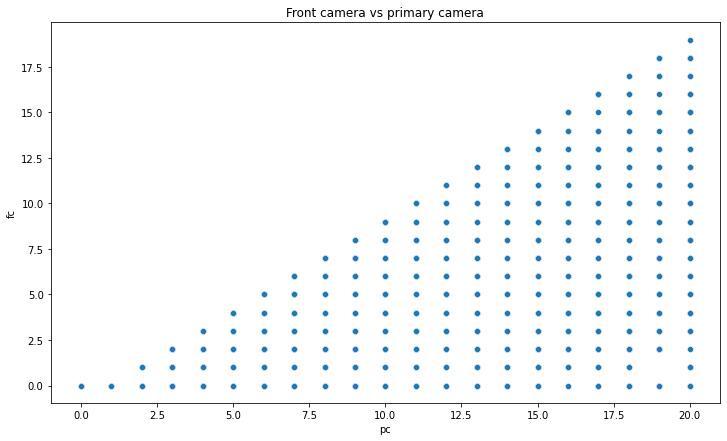

In [35]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = mobile_train, x = 'pc', y = 'fc')
plt.title('Front camera vs primary camera')


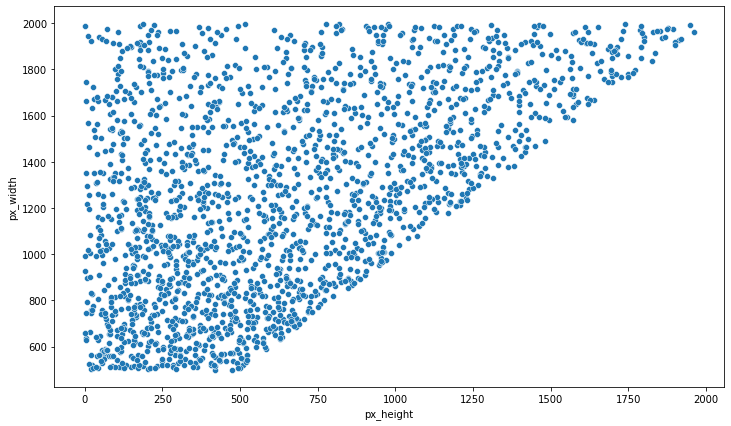

In [36]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = mobile_train, x = 'px_height', y = 'px_width')

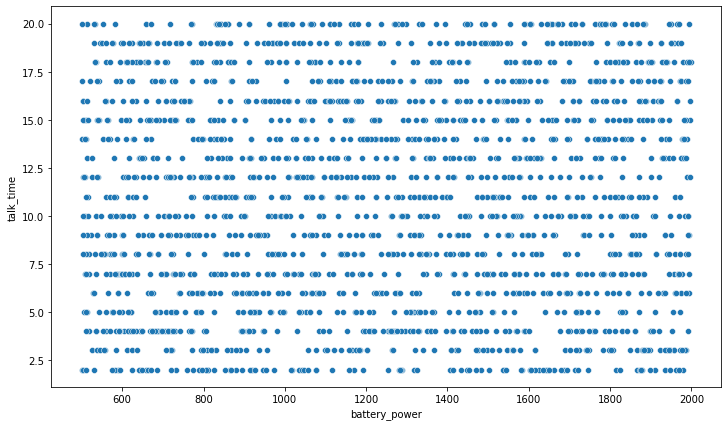

In [37]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = mobile_train, x = 'battery_power', y = 'talk_time')

## Exploring categorical features

No.of mobiles with BT: 1010
No.ofmobile which don't have BT: 990


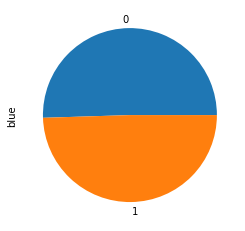

In [40]:
#display no. of phones which have or don't have buletooth
blue_count = mobile_train['blue'].value_counts()
print("No.of mobiles with BT: {}\nNo.ofmobile which don't have BT: {}" .format(blue_count[0],blue_count[1]))

blue_count.plot(kind = 'pie')

No.of mobiles with dualsim: 981
No.ofmobile which don't have dual sim: 1019


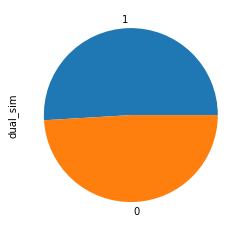

In [41]:
#display no. of phones which have or don't have dual simcards
sim_count = mobile_train['dual_sim'].value_counts()
print("No.of mobiles with dualsim: {}\nNo.ofmobile which don't have dual sim: {}" .format(sim_count[0],sim_count[1]))

sim_count.plot(kind = 'pie')

No.of mobiles with 3g: 477
No.of mobile which don't have 3g: 1523


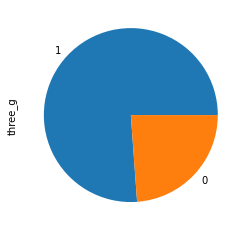

In [42]:
#display no. of phones which have or don't have 3g
count_3g = mobile_train['three_g'].value_counts()
print("No.of mobiles with 3g: {}\nNo.of mobile which don't have 3g: {}" .format(count_3g[0],count_3g[1]))

count_3g.plot(kind = 'pie')

No.of mobiles with 4g: 957
No.ofmobile which don't have 4g: 1043


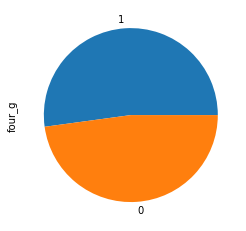

In [43]:
#display no. of phones which have or don't have 4g
count_4g = mobile_train['four_g'].value_counts()
print("No.of mobiles with 4g: {}\nNo.ofmobile which don't have 4g: {}" .format(count_4g[0],count_4g[1]))

count_4g.plot(kind = 'pie')

No.of mobiles with touchscreen: 994
No.ofmobile which don't have touchscreen: 1006


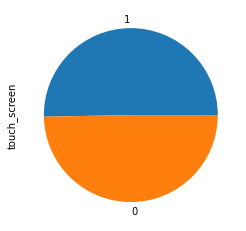

In [44]:
#display no. of phones which have or don't have touchscreen
touch_count = mobile_train['touch_screen'].value_counts()
print("No.of mobiles with touchscreen: {}\nNo.ofmobile which don't have touchscreen: {}" .format(touch_count[0],touch_count[1]))

touch_count.plot(kind = 'pie')

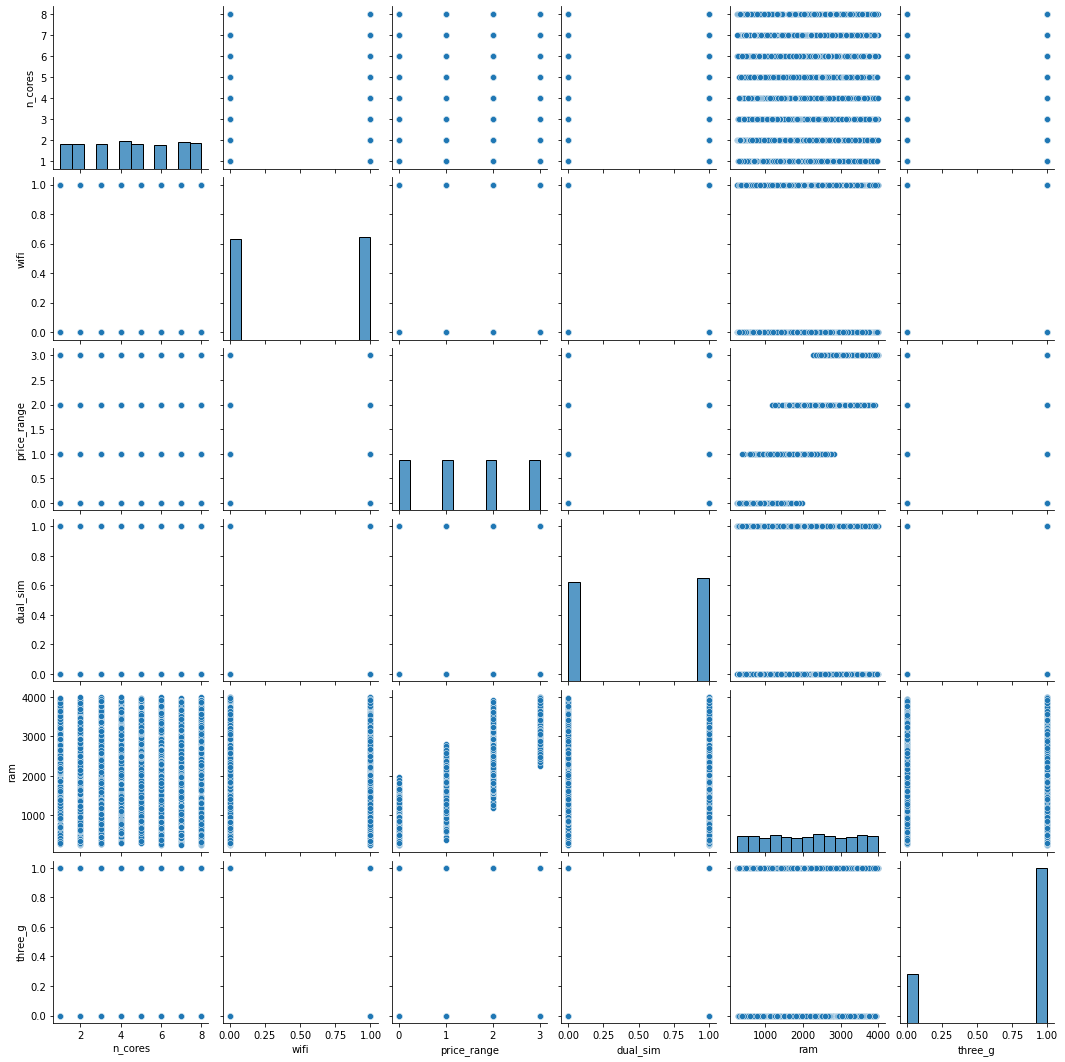

In [47]:
sns.pairplot(mobile_train, vars = ['n_cores', 'wifi', 'price_range','dual_sim', 'ram', 'three_g'])

# Data preprocessing

In [48]:
training_data = mobile_train.drop('price_range', axis =1)
training_labels = mobile_train['price_range']

In [50]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scale_features(num_input_data):
  """
  Take input numerical data and retuen the normalised data ranges b/w 0 and 1
  """
  normalised_data = scaler.fit_transform(num_input_data)
  return normalised_data

In [54]:
training_final = scale_features(training_data)


### Creating and training logistic regression model

In [55]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(training_final,training_labels)

LogisticRegression()

In [56]:
log_model.score(training_final,training_labels)

0.947

In [ ]:
# log_model.score() gives accuracy of model on training data and labels. 

In [57]:
# trying other models SGD(stochastic gradient descent)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(training_final, training_labels)

SGDClassifier()

In [58]:
sgd_clf.score(training_final, training_labels)

0.77

In [59]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(training_final, training_labels)

DecisionTreeClassifier()

In [60]:
tree_clf.score(training_final, training_labels)

1.0

score can give signal that model is overfitted(memorised the data but would likely be poor on new data)

## **Model** **Evaluation**

In [61]:
# cross validation
import warnings
warnings.filterwarnings('ignore')

In [63]:
from sklearn.model_selection import cross_val_score

log_scores = cross_val_score(log_model, training_final, training_labels, cv= 10)

In [64]:
log_scores

array([0.915, 0.94 , 0.91 , 0.93 , 0.935, 0.94 , 0.92 , 0.925, 0.91 ,
       0.92 ])

In [65]:
log_scores.mean()

0.9245000000000001

In [67]:
# sgd
sgd_scores = cross_val_score(sgd_clf, training_final, training_labels, cv= 10)
sgd_scores

array([0.75 , 0.775, 0.785, 0.82 , 0.78 , 0.735, 0.76 , 0.82 , 0.76 ,
       0.735])

In [68]:
sgd_scores.mean()

0.772

In [71]:
# decision tree
tree_scores = cross_val_score(tree_clf, training_final, training_labels, cv= 10)
tree_scores

array([0.79 , 0.87 , 0.85 , 0.83 , 0.845, 0.845, 0.815, 0.815, 0.84 ,
       0.805])

In [72]:
tree_scores.mean()

0.8305

In [73]:
from sklearn.model_selection import cross_val_predict
predictions_on_train = cross_val_predict(log_model, training_final, training_labels, cv= 10)

# Classification performance metrics

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(training_labels, predictions_on_train)

array([[488,  12,   0,   0],
       [ 31, 441,  28,   0],
       [  0,  35, 430,  35],
       [  0,   0,  10, 490]])

Text(0.5, 15.0, 'predicted label')

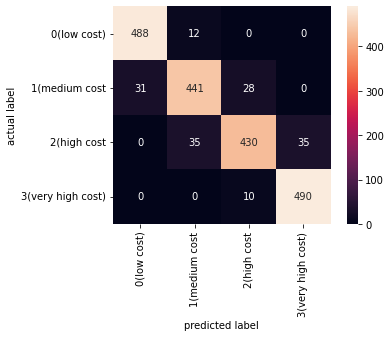

In [76]:
cm = confusion_matrix(training_labels, predictions_on_train)
sns.heatmap(cm, annot = True, square = True, fmt= 'd', cbar = True,
            xticklabels = ['0(low cost)', '1(medium cost', '2(high cost', '3(very high cost)'],
            yticklabels = ['0(low cost)', '1(medium cost', '2(high cost', '3(very high cost)']
            )
plt.ylabel('actual label')
plt.xlabel('predicted label')

# NOTE: 
predicted class are on column axis, whereas the actual classes are on row axis.

Target feature is a price_range which has 4 classes 0(low cost)', '1(medium cost', '2(high cost', '3(very high cost)'

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(training_labels, predictions_on_train)

0.9245

In [80]:
from sklearn.metrics import classification_report

print(classification_report(training_labels, predictions_on_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       500
           1       0.90      0.88      0.89       500
           2       0.92      0.86      0.89       500
           3       0.93      0.98      0.96       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

